In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
sns.set()

C:\Games\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Games\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [3]:
data_raw = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
data_raw

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [4]:
year = []
month = []
for i in data_raw['Quarter']:
    year.append('19'+i[3:])
    if i[:2] == 'Q1':
        month.append('January')
    elif i[:2] == 'Q2':
        month.append('April')
    elif i[:2] == 'Q3':
        month.append('July')
    else:
        month.append('October')

data = data_raw.copy()
data['year'] = year
data['month'] = month
data['t'] = range(1, len(data)+1)
data['t_squared'] = data['t']**2
data

,Quarter,Sales,year,month,t,t_squared
0,Q1_86,1734.827000,1986,January,1,1
1,Q2_86,2244.960999,1986,April,2,4
2,Q3_86,2533.804993,1986,July,3,9
3,Q4_86,2154.962997,1986,October,4,16
4,Q1_87,1547.818996,1987,January,5,25
5,Q2_87,2104.411995,1987,April,6,36
6,Q3_87,2014.362999,1987,July,7,49
7,Q4_87,1991.746998,1987,October,8,64
8,Q1_88,1869.049999,1988,January,9,81
9,Q2_88,2313.631996,1988,April,10,100


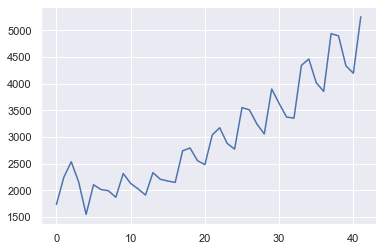

In [5]:
plt.plot(data_raw['Sales'])

<AxesSubplot:xlabel='year', ylabel='Sales'>

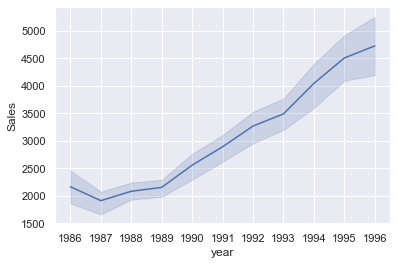

In [6]:
sns.lineplot(x = 'year', y = 'Sales', data = data)

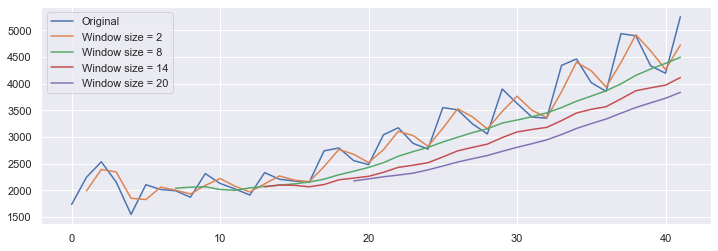

In [7]:
plt.figure(figsize = (12,4))
data['Sales'].plot(label = 'Original')
for i in range(2,24,6):
    data['Sales'].rolling(i).mean().plot(label = 'Window size = ' + str(i))
plt.legend()

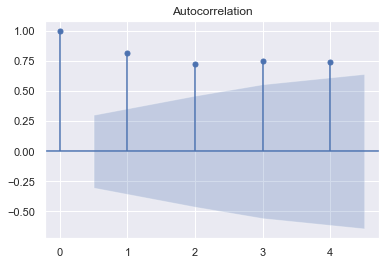

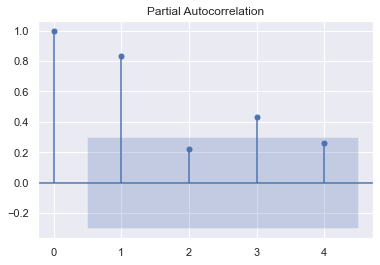

In [8]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data['Sales'], lags = 4)
tsa_plots.plot_pacf(data['Sales'], lags = 4)
plt.show()

In [9]:
train = data['Sales'][:36]
test = data['Sales'][36:]
test

36    3854.0
37    4936.0
38    4895.0
39    4333.0
40    4194.0
41    5253.0
Name: Sales, dtype: float64

In [10]:
predictions = data['Sales'][37:]
test_val = data['Sales'][36:-1]
rmse = np.sqrt((mean_squared_error(test_val, predictions)))
rmse

725.1277128892538

In [11]:
model = ARIMA(train, order=(3,1,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps = 6)[0]
rmse = np.sqrt(np.mean((test - forecast)**2))
rmse

C:\Games\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


429.1080609425668

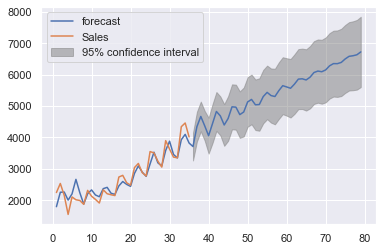

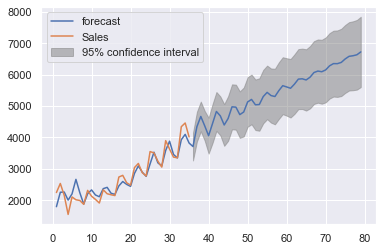

In [12]:
model_fit.plot_predict(1, 79)

In [13]:
pred_df = pd.DataFrame()
pred_df['Actual'] = test
pred_df['Predictions'] = forecast
pred_df['% Error'] = abs(test - forecast) / test * 100
pred_df

,Actual,Predictions,% Error
36,3854.0,3709.510702,3.749074
37,4936.0,4342.512518,12.023652
38,4895.0,4669.203103,4.612807
39,4333.0,4370.812299,0.872659
40,4194.0,4056.215495,3.285277
41,5253.0,4440.412010,15.469027
